In [1]:
import h5py
import numpy as np
import pandas as pd
import scipy
from scipy import signal
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

2023-02-28 13:51:35.741124: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def getData(cfileName):

    # Read the *.cfile which has each element in float32 format.
    data = np.fromfile(cfileName, dtype="float32")

    # Take each consecutive interleaved I sample and Q sample to create a single complex element.
    data = data[0::2] + 1j*data[1::2]
    #print("data type=", type(data))
    # Return the complex numpy array.
    return data


def create_dataset(data, class_label):
    f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
    print(len(f))
    print(len(t))
    print(Zxx.shape)

    del data

    Zxx = Zxx.transpose()

    Zxx = abs(Zxx)
    # scaling the features (only real part of the data can be used)
    scaler = MinMaxScaler()
    scaler.fit(Zxx)
    print(scaler.data_max_)
    Zxx = scaler.transform(Zxx)

    X = Zxx[:num_samp_per_class]
    Y = np.full(num_samp_per_class, class_label)

    return X, Y


# number of samples per class
num_samp_per_class = 10000

# FFT size for the STFT operation (which is same as the feature vector size)
fft_size = feature_vector_size = 2048 #1024

# number of overlapping samples for the STFT operation
fft_overlap = 256

## iPhone6S_I_BeSh dataset

In [3]:
class_label = 10
for i in range(class_label):

    folder_path = "/Volumes/Transcend/PhD in Computing/Data Collection/Smartphones/EM_Signals_Location_oriented/iPhone 6S_Beer Sheva,Israel/"
    if(i==0):
        data = getData(folder_path + "calendar_app.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

    else:

        if(i==1):
            data = getData(folder_path + "camera_photo.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==2):
            data = getData(folder_path + "camera_video.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==3):
            data = getData(folder_path + "email_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==4):
            data = getData(folder_path + "gallary_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==5):
            data = getData(folder_path + "home_screen.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==6):
            data = getData(folder_path + "idle.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==7):
            data = getData(folder_path + "phone_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==8):
            data = getData(folder_path + "sms_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==9):
            data = getData(folder_path + "webbrowser_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        X = np.concatenate((X, dataset), axis=0) 
        Y = np.concatenate((Y, label), axis=0)
        
    print(i)
    print(X.shape)
    print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
# (em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/i13_I_BeSh.csv', header=False)

[0.0078125-0.03125j   0.0234375-0.015625j  0.       -0.015625j  ...
 0.015625 -0.03125j   0.015625 -0.0234375j 0.0234375-0.015625j ]
2048
145922
(2048, 145922)
[0.02337346 0.01257491 0.00380188 ... 0.00212662 0.0039589  0.01270302]
0
(10000, 2048)
(10000,)
[ 0.0234375-0.015625j   0.0234375-0.0078125j  0.0234375-0.015625j  ...
  0.046875 +0.j        -0.015625 -0.0078125j  0.046875 -0.015625j ]
2048
158064
(2048, 158064)
[0.02290634 0.01239741 0.0045376  ... 0.00201616 0.00456291 0.01222033]
1
(20000, 2048)
(20000,)
[0.0234375-0.0234375j 0.015625 +0.j        0.0078125-0.0234375j ...
 0.0390625-0.03125j   0.       -0.0078125j 0.015625 +0.j       ]
2048
131661
(2048, 131661)
[0.02290835 0.01234141 0.00433436 ... 0.00230845 0.00446289 0.0121475 ]
2
(30000, 2048)
(30000,)
[-0.015625 +0.0234375j  0.0390625-0.046875j   0.0078125+0.015625j  ...
  0.0234375-0.046875j   0.015625 +0.0078125j  0.0390625-0.0234375j]
2048
143513
(2048, 143513)
[0.03454116 0.01952716 0.00571871 ... 0.00543358 0.006045

## Cross-model Validation

## iPhone6S_I model

Cross-model Validation without training

In [4]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone6S/iPhone6S_I_Own_Models/iPHONE6S_I_model.h5")
model.summary()

2023-02-28 14:07:32.783208: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
Non-

In [5]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 15s 5ms/step - loss: 7.9964 - accuracy: 0.1011
test loss, test acc: [7.996389865875244, 0.10108000040054321]


In [6]:
y_pred = np.argmax(model.predict(X), axis=-1)


print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 13s 4ms/step
[[  84    0    0    0    0    0 5839  372 1588 2117]
 [  39    0    0    0    0    0 8907  141  377  536]
 [  31    0    0    0    0    0 8676  132  380  781]
 [   0    2    0    0    0    0 9665    0    6  327]
 [  13    0    0    0    0    0 9454   13  232  288]
 [   4    2    0    0    0    0 9859    9   31   95]
 [   4    0    0    0    0    0 9337    8  245  406]
 [  10    0    0    0    0    0 7754  180  178 1878]
 [  43  349    0   67    0    0 1964 1978  383 5216]
 [   0   46    0    0    0    0 9777    0   53  124]]
              precision    recall  f1-score   support

           0       0.37      0.01      0.02     10000
           1       0.00      0.00      0.00     10000
           2       0.00      0.00      0.00     10000
           3       0.00      0.00      0.00     10000
           4       0.00      0.00      0.00     10000
           5       0.00      0.00      0.00     10000
           6       0.11      0.9

Test Accuracy:0.10108


Text(0.5, 1.0, 'Accuracy:0.101')

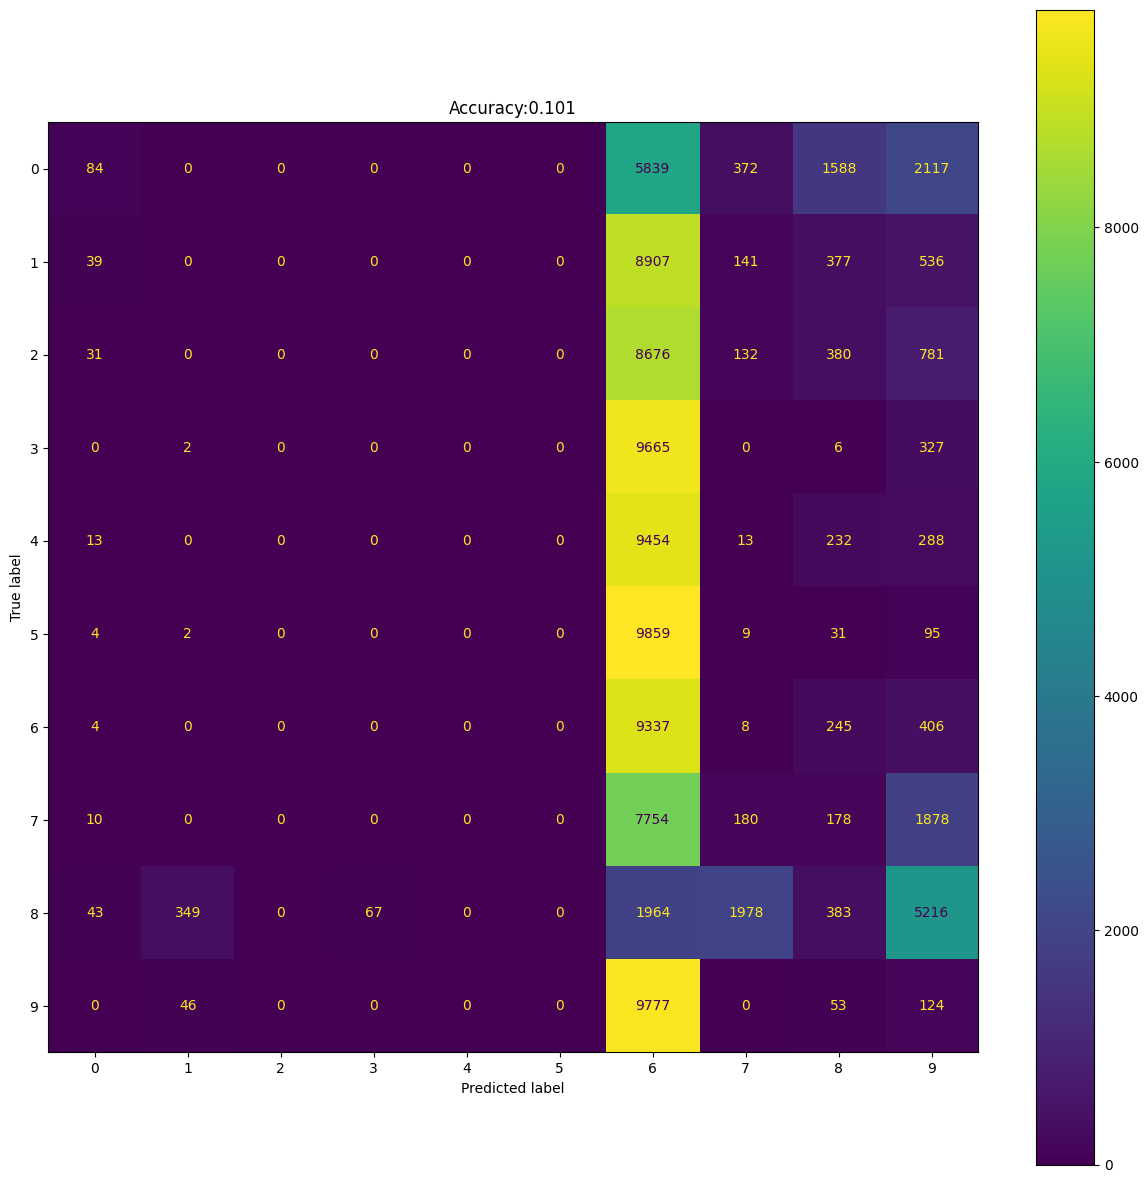

In [7]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [8]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-trai

In [10]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 19s 6ms/step - loss: 1.2264 - accuracy: 0.5537
Epoch 2/30
3125/3125 [==============================] - 15s 5ms/step - loss: 1.2232 - accuracy: 0.5540
Epoch 3/30
3125/3125 [==============================] - 16s 5ms/step - loss: 1.2203 - accuracy: 0.5556
Epoch 4/30
3125/3125 [==============================] - 13s 4ms/step - loss: 1.2170 - accuracy: 0.5565
Epoch 5/30
3125/3125 [==============================] - 20s 6ms/step - loss: 1.2142 - accuracy: 0.5577
Epoch 6/30
3125/3125 [==============================] - 20s 6ms/step - loss: 1.2110 - accuracy: 0.5588
Epoch 7/30
3125/3125 [==============================] - 19s 6ms/step - loss: 1.2083 - accuracy: 0.5600
Epoch 8/30
3125/3125 [==============================] - 19s 6ms/step - loss: 1.2053 - accuracy: 0.5608
Epoch 9/30
3125/3125 [==============================] - 14s 5ms/step - loss: 1.2024 - accuracy: 0.5628
Epoch 10/30
3125/3125 [==============================] - 13s 4ms/step - l

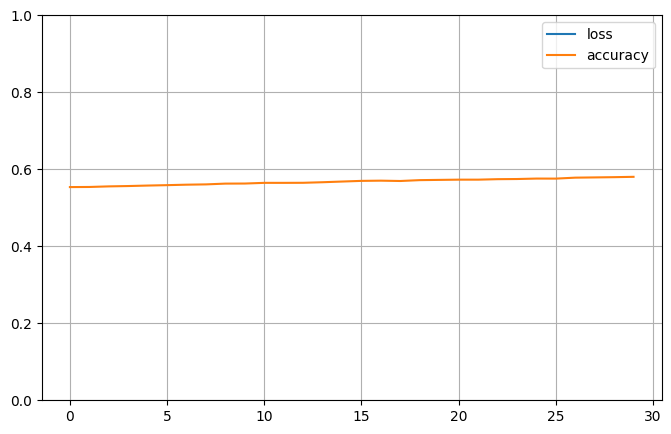

In [11]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [12]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 13s 4ms/step - loss: 1.1522 - accuracy: 0.5803
test loss, test acc: [1.1522173881530762, 0.5802900195121765]


In [13]:
y_pred = np.argmax(model.predict(X), axis=-1)


print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 12s 4ms/step
[[5011  524 1423    5  869   88  536 1286  235   23]
 [1273 1741 2381    2 2269  490  612 1148   36   48]
 [1315  849 3251   12 2008  339  746 1369   54   57]
 [   0    0    0 8027    0  195    1   11    7 1759]
 [ 482  659 1459    2 5146  374 1068  666   10  134]
 [   6  106   76  183  208 7469  327  517   32 1076]
 [ 677  413  987   28 1980  517 4055 1173   27  143]
 [ 730  403 1096   79  334  246  663 6341   87   21]
 [ 108    6    1   16    0   19   17   51 9761   21]
 [   6    0    3 1605    9  993   50   89   18 7227]]
              precision    recall  f1-score   support

           0       0.52      0.50      0.51     10000
           1       0.37      0.17      0.24     10000
           2       0.30      0.33      0.31     10000
           3       0.81      0.80      0.80     10000
           4       0.40      0.51      0.45     10000
           5       0.70      0.75      0.72     10000
           6       0.50      0.4

Test Accuracy:0.58029


Text(0.5, 1.0, 'Accuracy:0.580')

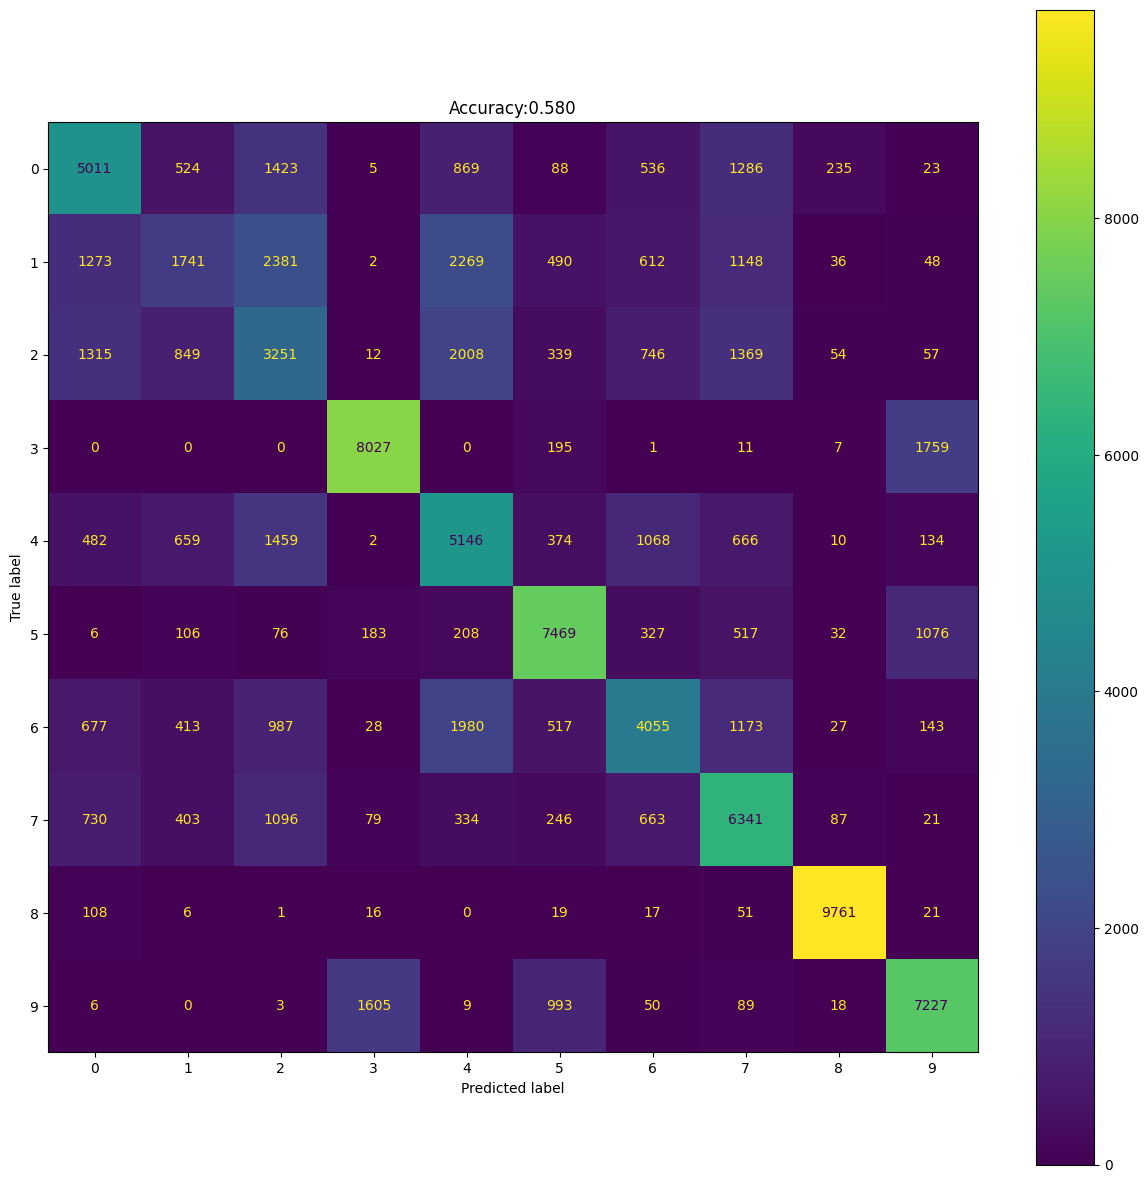

In [14]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone14Pro_I(ii) model

Cross-model Validation without training

In [15]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone6S/iPhone6S_I_Own_Models/iPHONE6S_I(ii)_model.h5")
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_13 (Dense)            (None, 800)               1120800   
                                                                 
 dense_14 (Dense)            (None, 500)               400500    
                                                                 
 dense_15 (Dense)            (None, 200)               100200    
                                                                 
 dense_16 (Dense)            (None, 100)               20100     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [16]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 15s 5ms/step - loss: 6.0714 - accuracy: 0.1186
test loss, test acc: [6.071415424346924, 0.11857999861240387]


In [17]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 13s 4ms/step
[[2787 2093   33  751  110   35 4186    0    0    5]
 [1348 1738    2  966  466   58 5376    1    0   45]
 [ 940 1675    1 1181  144   99 5953    0    0    7]
 [ 175    1    0    0    0    0 9823    1    0    0]
 [ 679 1591    0 1385  137   75 6122    0    0   11]
 [ 505   10    0   28    6    4 9377    0    0   70]
 [ 377 1887    0  477   44   15 7191    0    0    9]
 [ 730 1869    2  231   39    3 7120    0    0    6]
 [3870   42    7  103    0    2 5864  112    0    0]
 [ 204    8    0    1    0    0 9787    0    0    0]]
              precision    recall  f1-score   support

           0       0.24      0.28      0.26     10000
           1       0.16      0.17      0.17     10000
           2       0.02      0.00      0.00     10000
           3       0.00      0.00      0.00     10000
           4       0.14      0.01      0.03     10000
           5       0.01      0.00      0.00     10000
           6       0.10      0.7

Test Accuracy:0.11858


Text(0.5, 1.0, 'Accuracy:0.119')

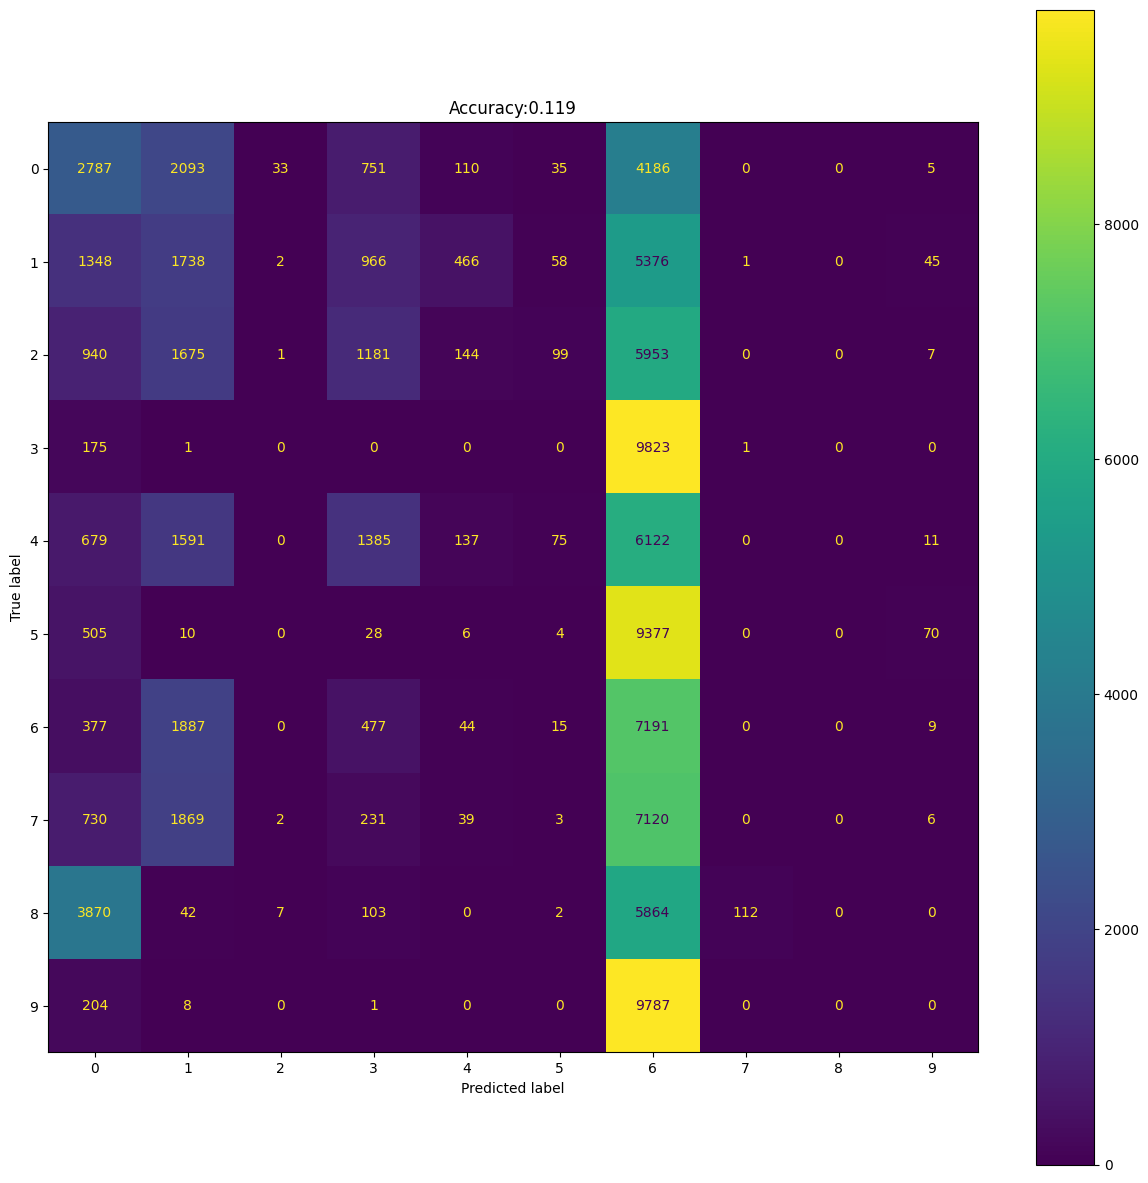

In [18]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [19]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_13 (Dense)            (None, 800)               1120800   
                                                                 
 dense_14 (Dense)            (None, 500)               400500    
                                                                 
 dense_15 (Dense)            (None, 200)               100200    
                                                                 
 dense_16 (Dense)            (None, 100)               20100     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-tr

In [20]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 13s 4ms/step - loss: 2.7503 - accuracy: 0.1587
Epoch 2/30
3125/3125 [==============================] - 13s 4ms/step - loss: 1.7971 - accuracy: 0.3681
Epoch 3/30
3125/3125 [==============================] - 13s 4ms/step - loss: 1.5409 - accuracy: 0.4521
Epoch 4/30
3125/3125 [==============================] - 12s 4ms/step - loss: 1.4285 - accuracy: 0.4903
Epoch 5/30
3125/3125 [==============================] - 12s 4ms/step - loss: 1.3647 - accuracy: 0.5157
Epoch 6/30
3125/3125 [==============================] - 13s 4ms/step - loss: 1.3224 - accuracy: 0.5326
Epoch 7/30
3125/3125 [==============================] - 13s 4ms/step - loss: 1.2918 - accuracy: 0.5450
Epoch 8/30
3125/3125 [==============================] - 13s 4ms/step - loss: 1.2675 - accuracy: 0.5523
Epoch 9/30
3125/3125 [==============================] - 14s 4ms/step - loss: 1.2480 - accuracy: 0.5597
Epoch 10/30
3125/3125 [==============================] - 14s 4ms/step - l

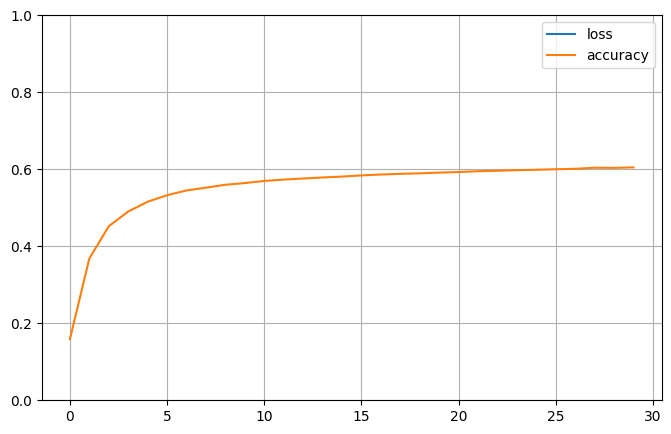

In [21]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [22]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 13s 4ms/step - loss: 1.0947 - accuracy: 0.6069
test loss, test acc: [1.0946625471115112, 0.6068500280380249]


In [23]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 13s 4ms/step
[[5129 1141  822   12  842  132  408 1399  105   10]
 [1330 4236  887    3 1431  307  783 1008    5   10]
 [1417 1644 2232   13 2181  281  983 1206   27   16]
 [   0    0    0 8867    0   31    0    0   57 1045]
 [ 880 1399 1028    5 4704  267 1134  572    4    7]
 [  21   85   60  102  181 8172  112  160   60 1047]
 [ 550  992  534   11 1094  369 4747 1635   14   54]
 [1019  785  462   56  398  197 1291 5611   54  127]
 [  37    0    3  239    0   29    1   12 9566  113]
 [   3    1    1 1306    3 1063   20  102   80 7421]]
              precision    recall  f1-score   support

           0       0.49      0.51      0.50     10000
           1       0.41      0.42      0.42     10000
           2       0.37      0.22      0.28     10000
           3       0.84      0.89      0.86     10000
           4       0.43      0.47      0.45     10000
           5       0.75      0.82      0.78     10000
           6       0.50      0.4

Test Accuracy:0.60685


Text(0.5, 1.0, 'Accuracy:0.607')

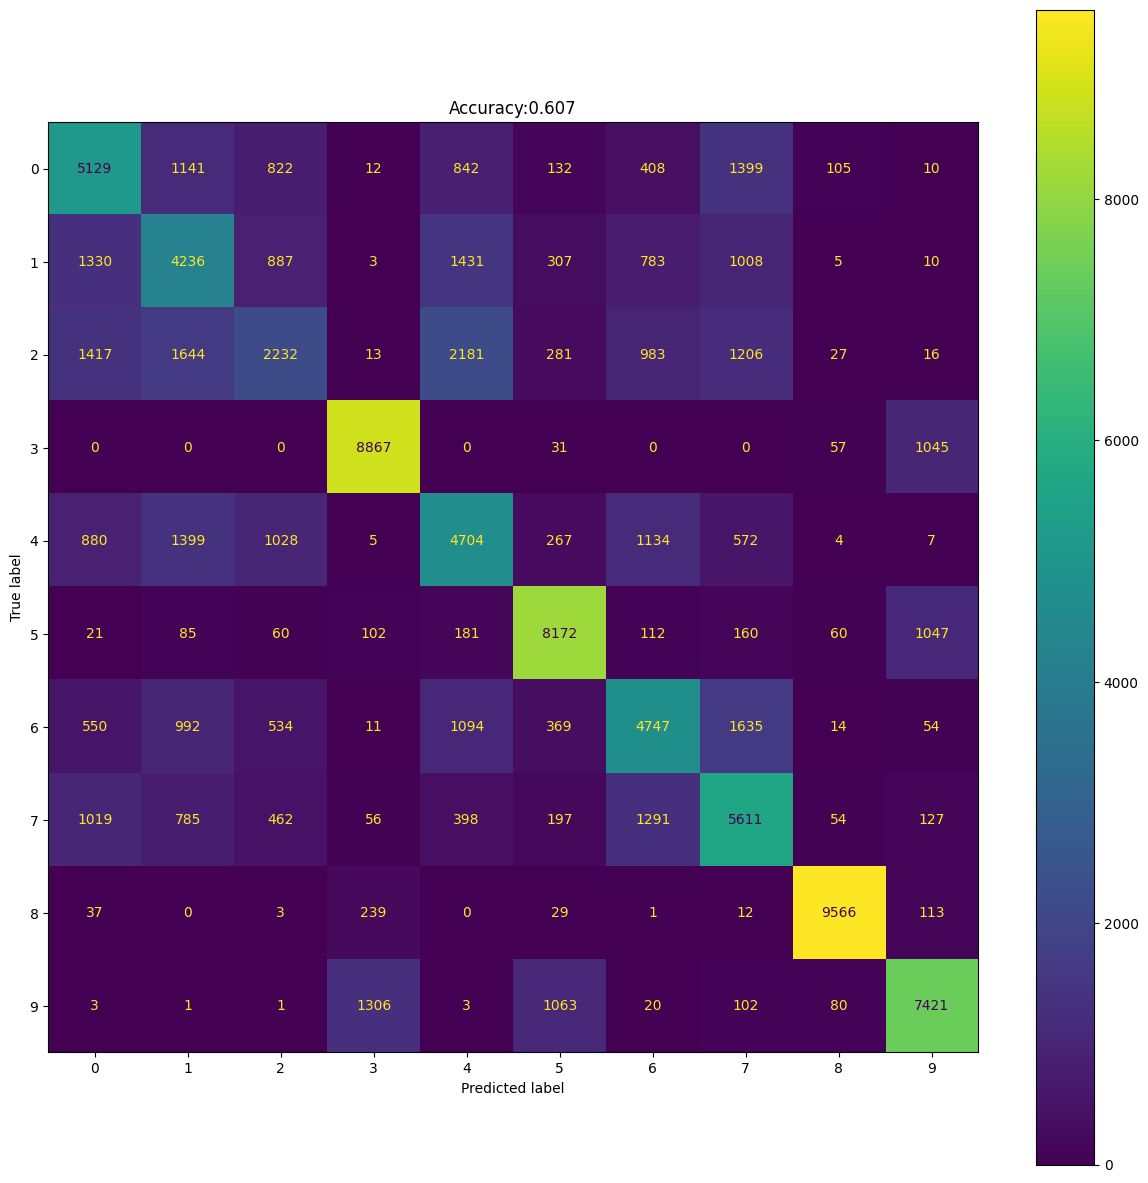

In [24]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')